<a href="https://colab.research.google.com/github/EvelynZhaoAnalytics/DataAnalystPortfolio/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix   # Reporting metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
credit_score = pd.read_csv("/content/drive/MyDrive/Credit Score Training Set.csv")

In [5]:
credit_score.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
credit_score.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [8]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
credit_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


# Data Cleaning

In [ ]:
# We remove some attributes that are not accurate and will not contribute to the analysis.
# This is done because we want to keep the dataset concise, clean and with all factors that we think are relevant.
# This will create a clean and appropriate data table that will be more useful.

In [11]:
credit_score.shape

(100000, 28)

In [12]:
columns_to_remove = ['ID','Customer_ID','Month', 'Name', 'SSN', 'Payment_of_Min_Amount', 'Num_Credit_Card',
                     'Num_Credit_Inquiries', 'Delay_from_due_date', 'Changed_Credit_Limit']

credit_score = credit_score.drop(columns=columns_to_remove)

In [13]:
credit_score.shape

(100000, 18)

In [14]:
missing_values_count = credit_score.isnull().sum()

print("Number of missing values:\n", missing_values_count)

Number of missing values:
 Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [ ]:
# We clean the data by removing all null and duplicate values, cleaning the 'Age' and 'Annual_Income'
# columns by removing underscores and converting the 'Age' column to float type and removing all negative and very high age values

In [15]:
credit_score = credit_score.dropna()
credit_score.drop_duplicates()
credit_score.shape

(60116, 18)

In [17]:
credit_score['Monthly_Balance'] = credit_score['Monthly_Balance'].astype(str).str.replace('_', '')
credit_score['Monthly_Balance'] = pd.to_numeric(credit_score['Monthly_Balance'], errors='coerce')

credit_score['Annual_Income'] = credit_score['Annual_Income'].astype(str).str.replace('_', '')
credit_score['Annual_Income'] = pd.to_numeric(credit_score['Annual_Income'], errors='coerce')

credit_score['Outstanding_Debt'] = credit_score['Outstanding_Debt'].astype(str).str.replace('_', '')
credit_score['Outstanding_Debt'] = pd.to_numeric(credit_score['Outstanding_Debt'], errors='coerce')

credit_score['Num_of_Delayed_Payment'] = credit_score['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')
credit_score['Num_of_Delayed_Payment'] = pd.to_numeric(credit_score['Num_of_Delayed_Payment'], errors='coerce')

credit_score['Num_of_Loan'] = credit_score['Num_of_Loan'].astype(str).str.replace('_', '')
credit_score['Num_of_Loan'] = pd.to_numeric(credit_score['Num_of_Loan'], errors='coerce')

credit_score['Amount_invested_monthly'] = credit_score['Amount_invested_monthly'].astype(str).str.replace('_', '')
credit_score['Amount_invested_monthly'] = pd.to_numeric(credit_score['Amount_invested_monthly'], errors='coerce')

credit_score['Age'] = credit_score['Age'].astype(str).str.replace('_', '')
credit_score['Age'] = pd.to_numeric(credit_score['Age'], errors='coerce')

credit_score = credit_score[credit_score['Age'] >= 0]

credit_score = credit_score[(credit_score['Age'] > 0) & (credit_score['Age'] < 100)]

credit_score.shape

(58410, 18)

In [51]:
unique_values = credit_score['Credit_Score'].unique()
print("Credit Score Unique Values       : ", unique_values)
print("\n")
unique_values = credit_score['Credit_Mix'].unique()
print("Credit Mix Unique Values         : ", unique_values)
print("\n")
unique_values = credit_score['Occupation'].unique()
print("Occupation Unique Values         : ", unique_values)
unique_values = credit_score['Payment_Behaviour'].unique()
print("Payment Behaviour Unique Values  : ", unique_values)

Credit Score Unique Values       :  ['Good' 'Standard' 'Poor']


Credit Mix Unique Values         :  ['Good' 'Standard' 'Bad']


Occupation Unique Values         :  ['Scientist' 'Teacher' 'Engineer' 'Lawyer' 'Doctor' 'Journalist'
 'Entrepreneur' 'Manager' 'Media_Manager' 'Mechanic' 'Writer' 'Accountant'
 'Architect' 'Musician' 'Developer']
Payment Behaviour Unique Values  :  ['Low_spent_Small_value_payments' 'High_spent_Large_value_payments'
 'High_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Medium_value_payments' '!@9#%8'
 'Low_spent_Large_value_payments']


In [52]:
credit_score = credit_score[credit_score['Occupation'] != '_______']
credit_score = credit_score[credit_score['Credit_Mix'] != '_']
credit_score = credit_score[credit_score['Type_of_Loan'] != 'Not Specified']
credit_score = credit_score[credit_score['Payment_Behaviour'] != '!@9#%8']

In [20]:
# Handling missing values with mean
credit_score['Monthly_Balance'] = credit_score['Monthly_Balance'].fillna(credit_score['Monthly_Balance'].mean())

# Handling missing values with ffill
credit_score['Occupation'] = credit_score['Occupation'].replace('_______', method='ffill')

In [53]:
credit_score.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [54]:
credit_score.shape

(39538, 18)

In [55]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39538 entries, 6 to 99997
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       39538 non-null  int64  
 1   Occupation                39538 non-null  object 
 2   Annual_Income             39538 non-null  float64
 3   Monthly_Inhand_Salary     39538 non-null  float64
 4   Num_Bank_Accounts         39538 non-null  int64  
 5   Interest_Rate             39538 non-null  int64  
 6   Num_of_Loan               39538 non-null  int64  
 7   Type_of_Loan              39538 non-null  object 
 8   Num_of_Delayed_Payment    39538 non-null  int64  
 9   Credit_Mix                39538 non-null  object 
 10  Outstanding_Debt          39538 non-null  float64
 11  Credit_Utilization_Ratio  39538 non-null  float64
 12  Credit_History_Age        39538 non-null  object 
 13  Total_EMI_per_month       39538 non-null  float64
 14  Amount

# Data Visualization

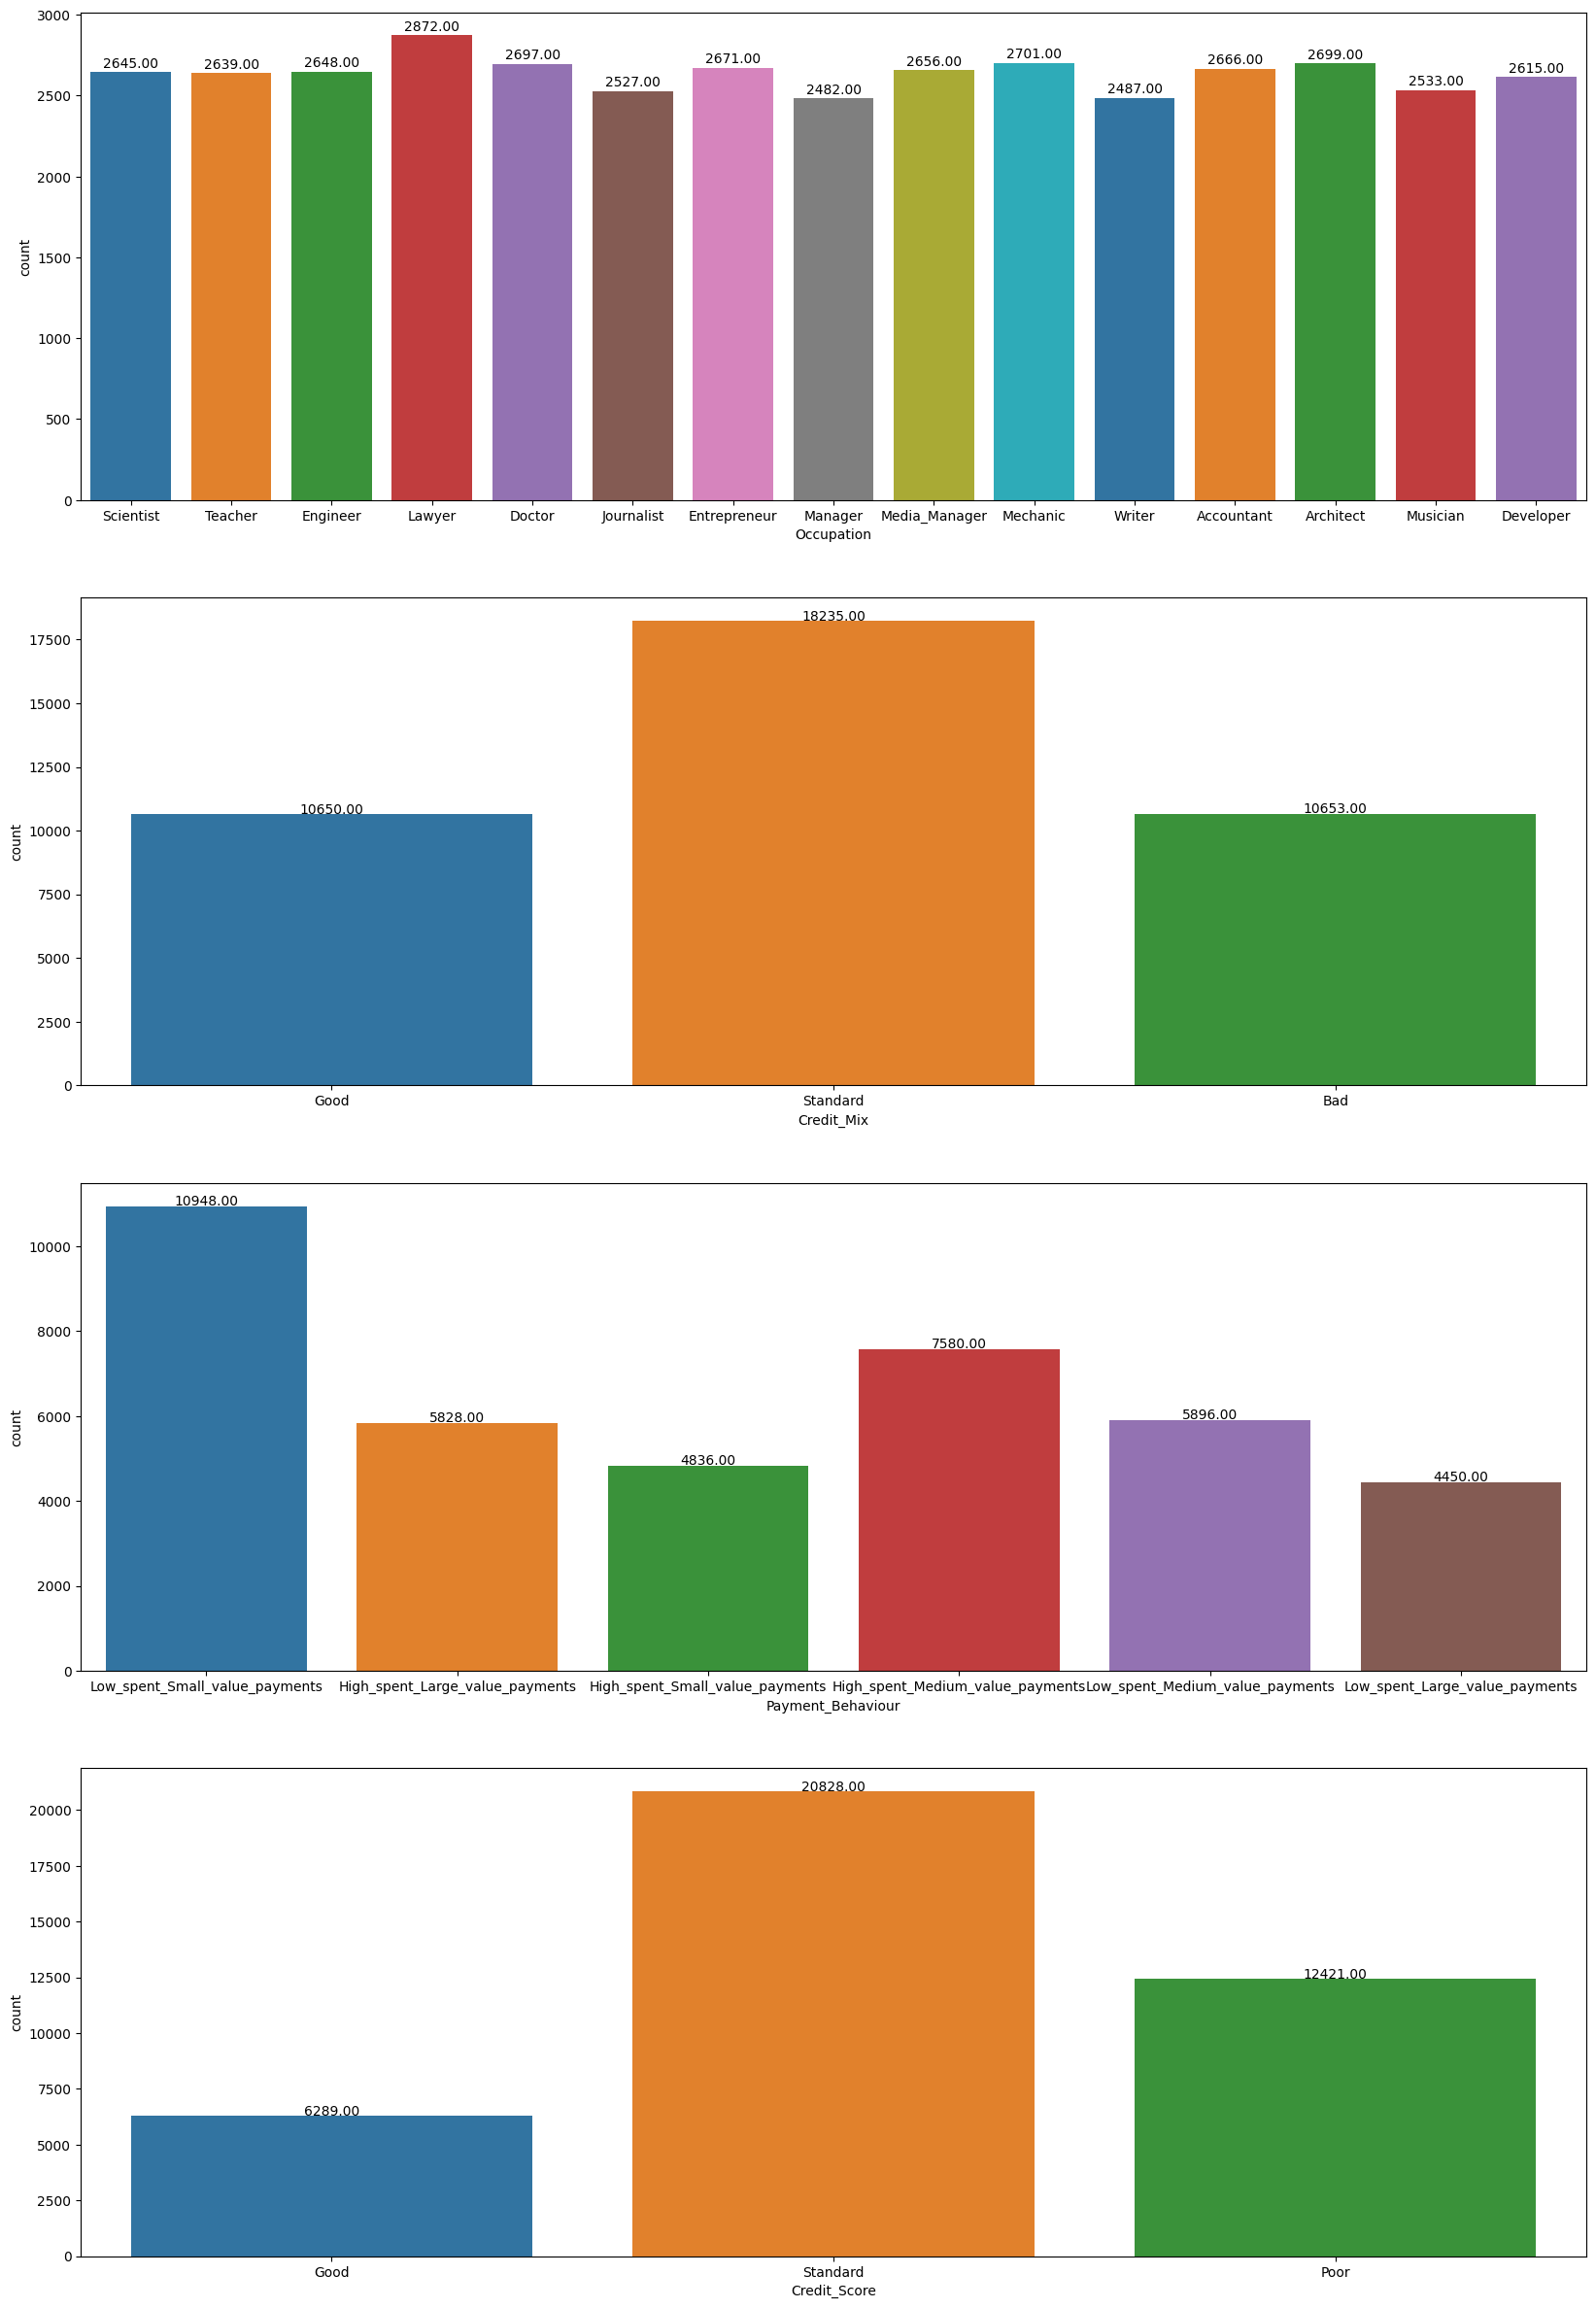

In [58]:
# Construct count plot for categorical variables
count_plot=credit_score[['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score']]
fig=plt.figure(figsize=(20,30))
for i in range(0,len(count_plot.columns)):
    ax=fig.add_subplot(4,1,i+1)
    sns_plot = sns.countplot(x=(count_plot[count_plot.columns[i]]),palette="tab10")
    for p in sns_plot.patches:
        height = p.get_height()
        sns_plot.text(p.get_x()+p.get_width()/2.,
            height + 30,
            '{:1.2f}'.format(height),
            ha="center")

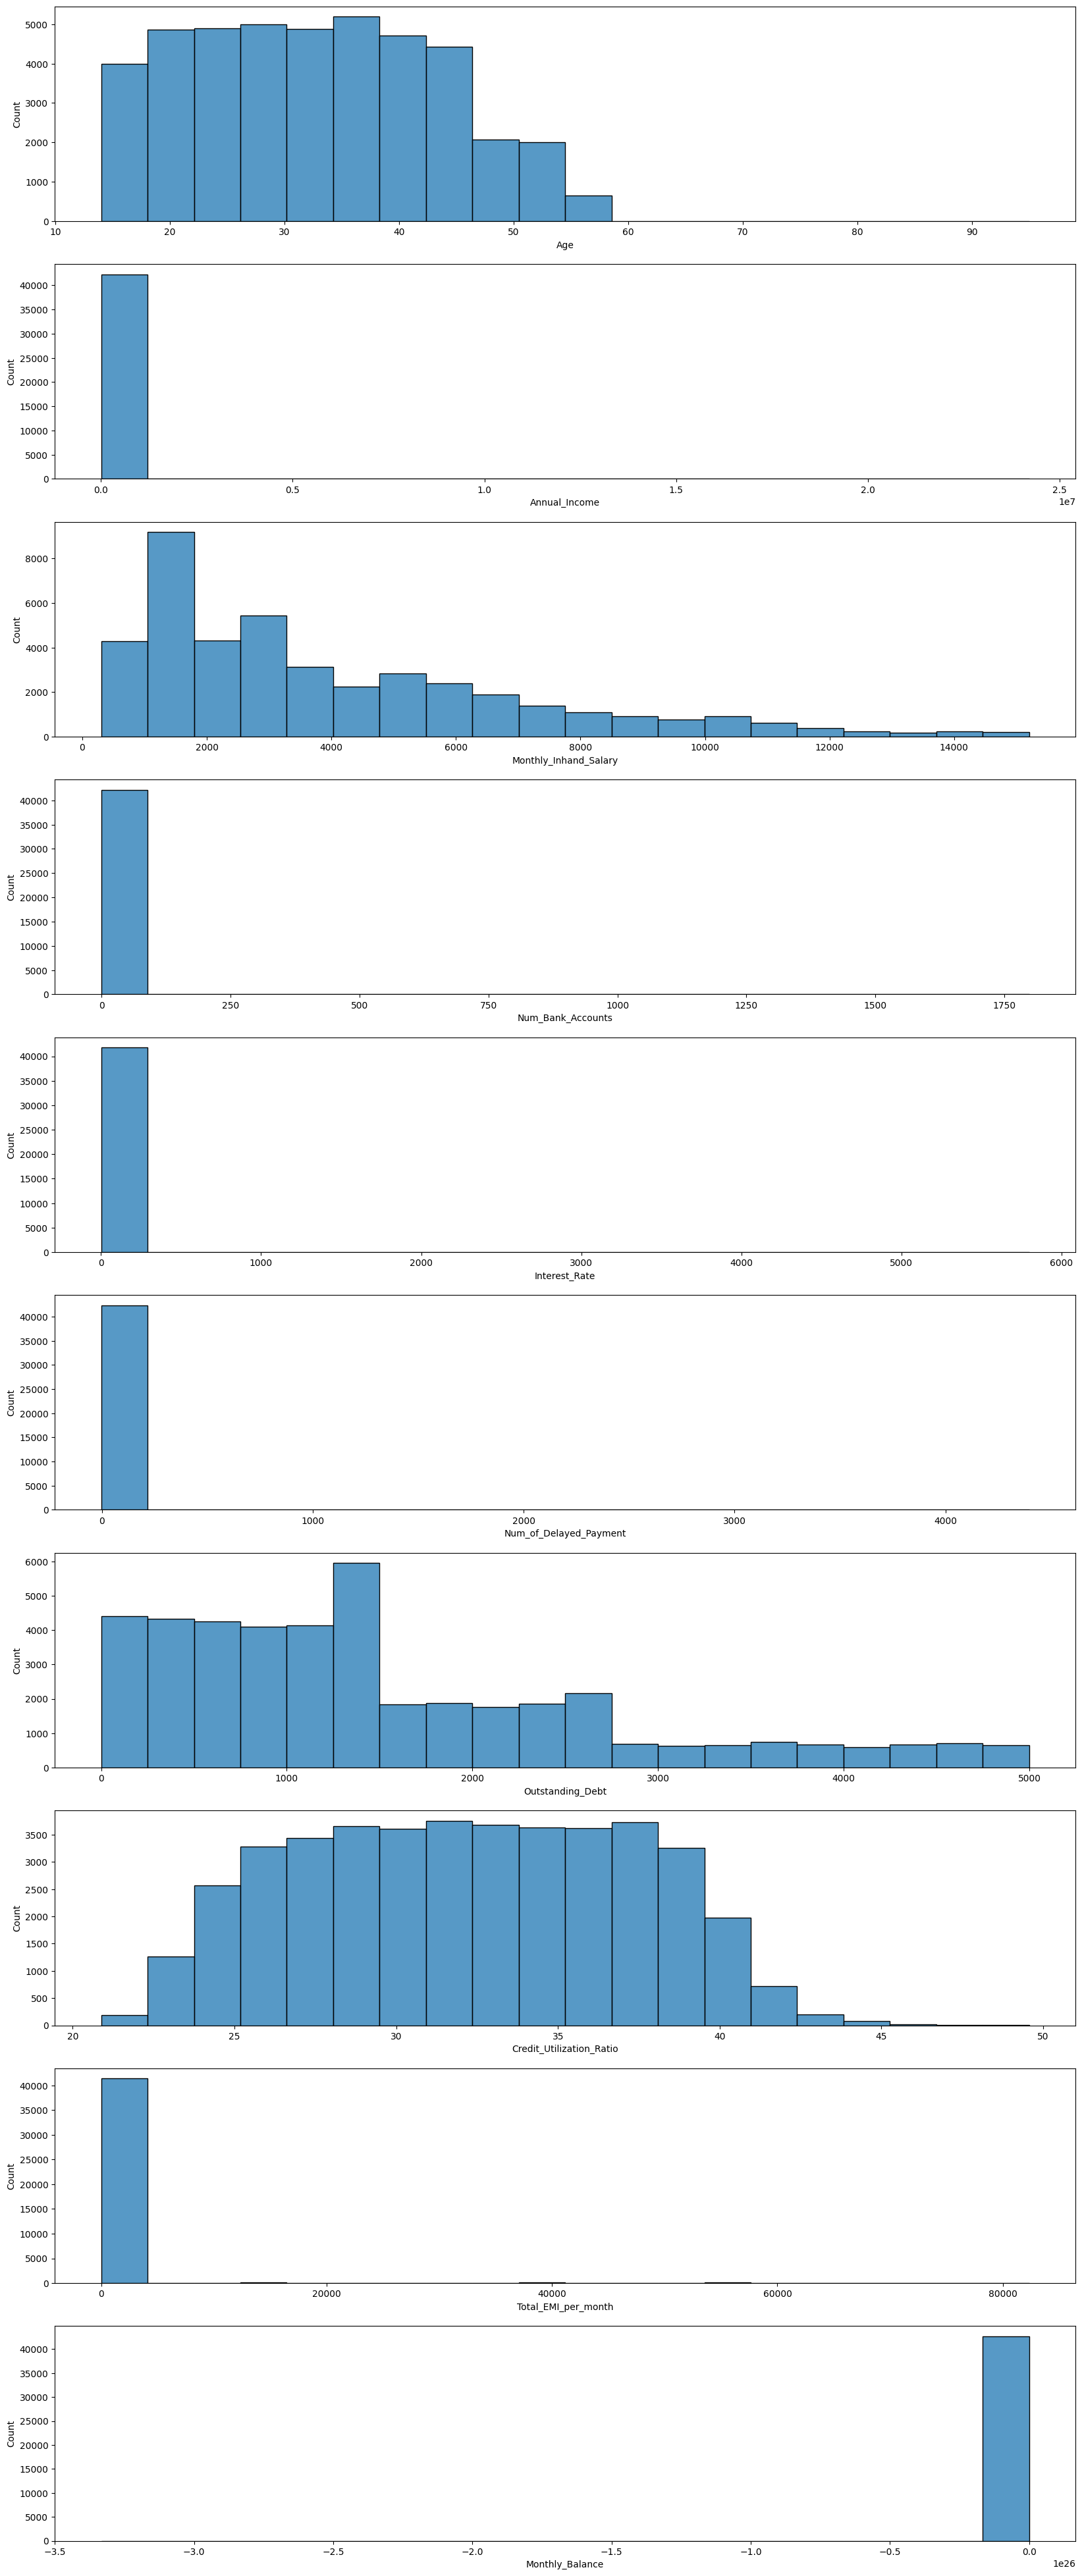

In [38]:
# Construct histogram plot for continuous variables
plot=credit_score[['Age', 'Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Interest_Rate','Num_of_Delayed_Payment',
 'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Monthly_Balance']]
fig=plt.figure(figsize=(20,50))
for i in range(0,len(plot.columns)):
    ax=fig.add_subplot(10,1,i+1)
    sns.histplot(x=plot[plot.columns[i]], data = credit_score, bins = 20, palette ='pastel')

<Axes: >

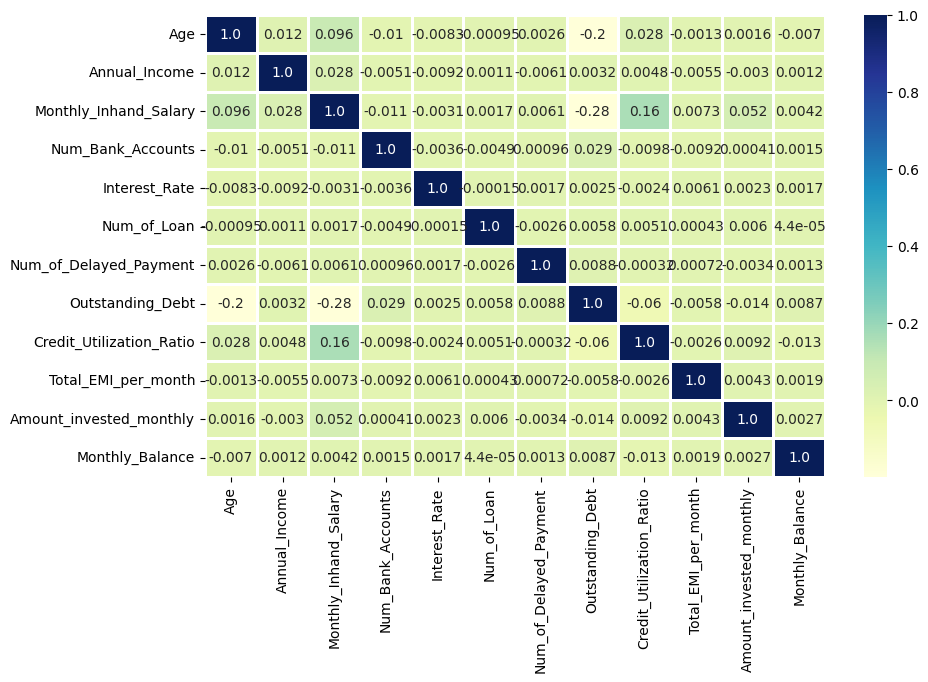

In [ ]:
# Correlations between the numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(credit_score.corr(), robust=True,fmt='.2',linewidth=1,cmap='YlGnBu',annot=True)

In [59]:
numeric_columns = credit_score.select_dtypes(include='number').columns.tolist()
numeric_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Interest_Rate',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [61]:
numeric = credit_score[['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Interest_Rate','Num_of_Delayed_Payment',
 'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Monthly_Balance']]

In [62]:
# Variables measured at different scales do not contribute equally to the model fitting and learning functions and might create biases.
# To deal with this problem, feature-wise standardization is usually used before model fitting.
from sklearn.preprocessing import StandardScaler

X=StandardScaler()
scaled_df=X.fit_transform(numeric)

In [63]:
scaled_df = pd.DataFrame(scaled_df, index=numeric.index, columns=numeric.columns)
scaled_df.head().T

,6,9,12,13,15
Age,-0.927490,-0.458873,-0.458873,-0.458873,-0.458873
Annual_Income,-0.109000,-0.098200,-0.098200,-0.098200,-0.098200
Monthly_Inhand_Salary,-0.707210,-0.313812,-0.313812,-0.313812,-0.313812
Num_Bank_Accounts,-0.118380,-0.126949,-0.126949,-0.126949,-0.126949
Interest_Rate,-0.154361,-0.148097,-0.148097,-0.148097,-0.148097
Num_of_Delayed_Payment,-0.103804,-0.134400,-0.134400,-0.138771,-0.121287
Outstanding_Debt,-0.593023,-0.764467,-0.764467,-0.764467,-0.764467
Credit_Utilization_Ratio,-1.910457,1.258902,0.551740,0.235683,0.147182
Total_EMI_per_month,-0.163814,-0.167592,-0.167592,-0.167592,-0.167592
Monthly_Balance,0.010059,0.010059,0.010059,0.010059,0.010059


# Data Modeling

## Logistic Regression

In [64]:
credit_score['Credit_Score']

6            Good
9            Good
12           Good
13           Good
15           Good
           ...   
99984        Poor
99985        Poor
99986        Poor
99991    Standard
99997        Poor
Name: Credit_Score, Length: 39538, dtype: object

In [65]:
# Transform the categorical columns into numeric columns

for feature in credit_score[['Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Credit_Mix', 'Credit_History_Age', 'Payment_Behaviour', 'Credit_Score']]:
    if credit_score[feature].dtype == 'object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(credit_score[feature].unique()))
        print(pd.Categorical(credit_score[feature].unique()).codes)
        credit_score[feature] = pd.Categorical(credit_score[feature]).codes



feature: Occupation
['Scientist', 'Teacher', 'Engineer', 'Lawyer', 'Doctor', ..., 'Writer', 'Accountant', 'Architect', 'Musician', 'Developer']
Length: 15
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician',
                          'Scientist', 'Teacher', 'Writer']
[12 13  4  7  3  6  5  8 10  9 14  0  1 11  2]


feature: Type_of_Loan
['Auto Loan, Credit-Builder Loan, Personal Loan..., 'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified', 'Credit-Builder Loan, and Mortgage Loan', 'Personal Loan, Debt Consolidation Loan, and A..., ..., 'Auto Loan, Payday Loan, Auto Loan, Student Lo..., 'Home Equity Loan, Payday Loan, Not Specified,..., 'Home Equity Loan, Auto Loan, Auto Loan, and A..., 'Payday Loan, Student Loan, Mortgage Loan, and..., 'Personal Loan, Auto Loan, Mortgage Loan, Stud...]
Length: 6206
Categories (6206, object): ['Auto Loan', 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, C...,
                            'Auto Loan, Aut

In [66]:
credit_score['Credit_Score']

6        0
9        0
12       0
13       0
15       0
        ..
99984    1
99985    1
99986    1
99991    2
99997    1
Name: Credit_Score, Length: 39538, dtype: int8

In [67]:
! pip install dmba
from dmba import regressionSummary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.2 MB/s eta 0:00:00
Colab environment detected.


In [68]:
# Break the dataset into training set and test set.
from sklearn.model_selection import train_test_split

# Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [69]:
# Copy all the predictor variables into X dataframe
x = credit_score.drop('Credit_Score', axis=1)

# Copy target into the y dataframe.
y = credit_score.pop('Credit_Score')

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print('x_Training data Shape:',x_train.shape)
print('x_Testing data Shape:',x_test.shape)
print('y_Training data Shape:',y_train.shape)
print('y_Testing data Shape:',y_test.shape)

x_Training data Shape: (27676, 17)
x_Testing data Shape: (11862, 17)
y_Training data Shape: (27676,)
y_Testing data Shape: (11862,)


In [71]:
y_train.unique()

array([2, 1, 0], dtype=int8)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
# Create and train a logistic regression model
#log_model = LogisticRegression(multi_class='multinomial')

log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Model Training
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
# Make predictions on the test data
y_pred_log = log_model.predict(x_test)

# Evaluate the model's performance on the test data
accuracy_log = accuracy_score(y_test, y_pred_log)
print('Validation Accuracy:', accuracy_log)

Validation Accuracy: 0.1614398920923959


In [76]:
# Regression Matrices
# For training set
regressionSummary(y_train, y_pred_log_t)


Regression statistics

               Mean Error (ME) : 1.3683
Root Mean Squared Error (RMSE) : 1.5560
     Mean Absolute Error (MAE) : 1.3683


In [77]:
# For test set
regressionSummary(y_test, y_pred_log)


Regression statistics

               Mean Error (ME) : 1.3663
Root Mean Squared Error (RMSE) : 1.5562
     Mean Absolute Error (MAE) : 1.3663


In [78]:
# Confusion Matrix for test set
cm_log = confusion_matrix(y_test, y_pred_log)
# Create a dataframe for a array-formatted Confusion matrix, so it will be easy for plotting.
cm_df = pd.DataFrame(cm_log, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
print('Confusion Matrix with Test Data:\n')
print(cm_df)

Confusion Matrix with Test Data:

          Good  Poor  Standard
Good      1915     0         0
Poor      3687     0         0
Standard  6260     0         0


In [79]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.16      1.00      0.28      1915
           1       0.00      0.00      0.00      3687
           2       0.00      0.00      0.00      6260

    accuracy                           0.16     11862
   macro avg       0.05      0.33      0.09     11862
weighted avg       0.03      0.16      0.04     11862



In [80]:
logreg_metrics1=classification_report(y_test, y_pred_log, output_dict=True)
logreg_df2=pd.DataFrame(logreg_metrics1).transpose()
logreg_test_precision=round(logreg_df2.loc["macro avg"][0],3)
logreg_test_recall=round(logreg_df2.loc["macro avg"][1],3)
logreg_test_f1=round(logreg_df2.loc["macro avg"][2],3)
print ('Logistic Regression precision ',logreg_test_precision)
print ('Logistic Regression recall ',logreg_test_recall)
print ('Logistic Regression f1-score ',logreg_test_f1)

Logistic Regression precision  0.054
Logistic Regression recall  0.333
Logistic Regression f1-score  0.093


In [ ]:
# Make predictions on the training data
y_pred_log_t = log_model.predict(x_train)

# Evaluate the model's performance on the training data
accuracy_log_t = accuracy_score(y_train, y_pred_log_t)
print('Validation Accuracy:', accuracy_log_t)

In [154]:
# Confusion Matrix
cm_log = confusion_matrix(y_train, y_pred_log_t)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_log, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
print('Confusion Matrix with Training Data:\n')
print(cm_df)

Confusion Matrix with Training Data:

           Good  Poor  Standard
Good       4374     0         0
Poor       8734     0         0
Standard  14568     0         0


In [155]:
logreg_metrics1=classification_report(y_train, y_pred_log_t,output_dict=True)
logreg_df2=pd.DataFrame(logreg_metrics1).transpose()
logreg_test_precision_t=round(logreg_df2.loc["macro avg"][0],3)
logreg_test_recall_t=round(logreg_df2.loc["macro avg"][1],3)
logreg_test_f1_t=round(logreg_df2.loc["macro avg"][2],3)
print ('Logistic Regression precision ',logreg_test_precision_t)
print ('Logistic Regression recall ',logreg_test_recall_t)
print ('Logistic Regression f1-score ',logreg_test_f1_t)

Logistic Regression precision  0.053
Logistic Regression recall  0.333
Logistic Regression f1-score  0.091


## KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# try K=3 through K=10 and record testing accuracy in the training set
k_range = range(3, 10)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through k and append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_train)
    scores.append(metrics.accuracy_score(y_train, y_pred_knn))

print(scores)

[0.8384520884520884, 0.792744616274028, 0.769294695765284, 0.7432071108541697, 0.7283566989449343, 0.7124945801416389, 0.7025581731464084]


In [83]:
# try K=3 through K=10 and record testing accuracy in the test set
k_range = range(3, 10)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_knn))

print(scores)

[0.66152419490811, 0.635306019221042, 0.6270443432810656, 0.6143989209239589, 0.6121227448996797, 0.6106895970325409, 0.6094250547968302]


In [84]:
# Fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
# Make predictions on the test data
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model's performance on the test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Validation Accuracy:', accuracy_knn)

Validation Accuracy: 0.66152419490811


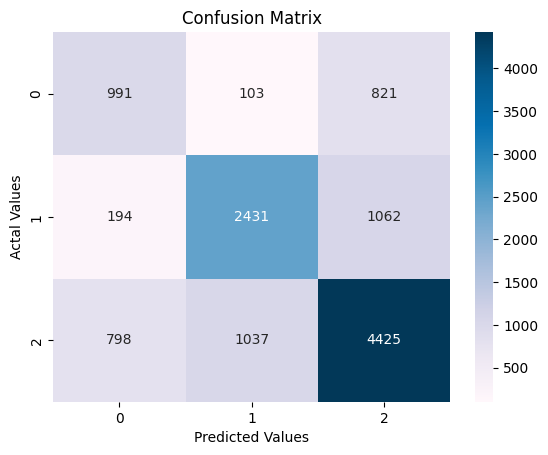

In [128]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm_knn, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
sns.heatmap(confusion_matrix(y_test, y_pred_knn),cmap='PuBu',fmt='d',annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [87]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1915
           1       0.68      0.66      0.67      3687
           2       0.70      0.71      0.70      6260

    accuracy                           0.66     11862
   macro avg       0.63      0.63      0.63     11862
weighted avg       0.66      0.66      0.66     11862



In [88]:
knn_metrics1=classification_report(y_test, y_pred_knn,output_dict=True)
knn_df2=pd.DataFrame(knn_metrics1).transpose()
knn_test_precision=round(knn_df2.loc["macro avg"][0],3)
knn_test_recall=round(knn_df2.loc["macro avg"][1],3)
knn_test_f1=round(knn_df2.loc["macro avg"][2],3)
print ('KNN Test Data precision ',knn_test_precision)
print ('KNN Test Data recall ',knn_test_recall)
print ('KNN Test Data f1-score ',knn_test_f1)

KNN Test Data precision  0.627
KNN Test Data recall  0.628
KNN Test Data f1-score  0.628


In [138]:
# Make predictions on the Training data
y_pred_knn_t = knn_model.predict(x_train)

# Evaluate the model's performance on the test data
accuracy_knn_t = accuracy_score(y_train, y_pred_knn_t)
print('Validation Accuracy:', accuracy_knn_t)

Validation Accuracy: 0.8384520884520884


In [139]:
# Confusion Matrix
cm_knn = confusion_matrix(y_train, y_pred_knn_t)
cm_df = pd.DataFrame(cm_knn, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
print('Confusion Matrix with Training Data:\n')
print(cm_df)

Confusion Matrix with Training Data:

          Good  Poor  Standard
Good      3485    55       834
Poor       270  7381      1083
Standard   920  1309     12339


In [140]:
knn_metrics1=classification_report(y_train, y_pred_knn_t,output_dict=True)
knn_df2=pd.DataFrame(knn_metrics1).transpose()
knn_test_precision_t=round(knn_df2.loc["macro avg"][0],3)
knn_test_recall_t=round(knn_df2.loc["macro avg"][1],3)
knn_test_f1_t=round(knn_df2.loc["macro avg"][2],3)
print ('KNN Training Data precision ',knn_test_precision_t)
print ('KNN Training Data recall ',knn_test_recall_t)
print ('KNN Training Data f1-score ',knn_test_f1_t)

KNN Training Data precision  0.818
KNN Training Data recall  0.83
KNN Training Data f1-score  0.824


## Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [91]:
# create a parameter grid with hyperparameters to tune the decision trees.
param_grid1= {
    'criterion': ['gini'],
    'max_depth': [10,25,50,100],
    'min_samples_leaf': [25,50,100],
    'min_samples_split': [30,100,150,200]
}

dt_model = DecisionTreeClassifier(random_state=12)

grid_search1= GridSearchCV(estimator = dt_model, param_grid = param_grid1, cv = 10)

In [92]:
grid_search1.fit(x_train, y_train)
print(grid_search1.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 30}


In [93]:
best_grid1= grid_search1.best_estimator_
best_grid1

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=12)

In [94]:
train_char_label = ['Good', 'Standard', 'Poor']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid1, out_file= tree_regularized, feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [97]:
# Make predictions on the test data
y_pred_dt = best_grid1.predict(x_test)

# Evaluate the model's performance on the test data
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Validation Accuracy:', accuracy_dt)

Validation Accuracy: 0.6815882650480526


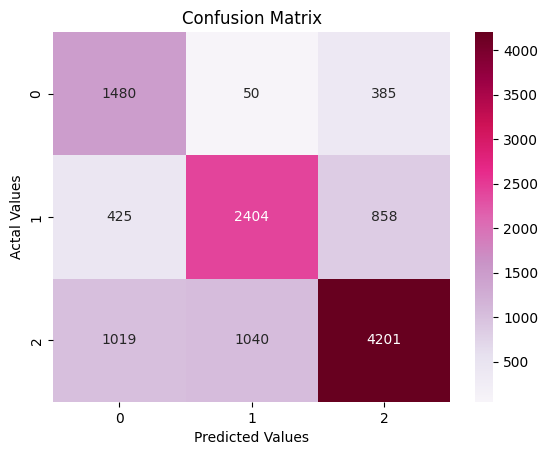

In [129]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm_dt, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
sns.heatmap(confusion_matrix(y_test, y_pred_dt),cmap='PuRd',fmt='d',annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [99]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.51      0.77      0.61      1915
           1       0.69      0.65      0.67      3687
           2       0.77      0.67      0.72      6260

    accuracy                           0.68     11862
   macro avg       0.66      0.70      0.67     11862
weighted avg       0.70      0.68      0.69     11862



In [100]:
dt_metrics1=classification_report(y_test, y_pred_dt,output_dict=True)
dt_df2=pd.DataFrame(dt_metrics1).transpose()
dt_test_precision=round(dt_df2.loc["macro avg"][0],3)
dt_test_recall=round(dt_df2.loc["macro avg"][1],3)
dt_test_f1=round(dt_df2.loc["macro avg"][2],3)
print ('Decision Tree precision ',dt_test_precision)
print ('Decision Tree recall ',dt_test_recall)
print ('Decision Tree f1-score ',dt_test_f1)

Decision Tree precision  0.655
Decision Tree recall  0.699
Decision Tree f1-score  0.666


In [141]:
# Make predictions on the Training data
y_pred_dt_t = best_grid1.predict(x_train)

# Evaluate the model's performance on the training data
accuracy_dt_t = accuracy_score(y_train, y_pred_dt_t)
print('Validation Accuracy:', accuracy_dt_t)

Validation Accuracy: 0.7195042636219107


In [142]:
# Confusion Matrix
cm_dt = confusion_matrix(y_train, y_pred_dt_t)

cm_df = pd.DataFrame(cm_dt, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
print('Confusion Matrix with Training Data:\n')
print(cm_df)

Confusion Matrix with Training Data:

          Good  Poor  Standard
Good      3525   119       730
Poor       997  6014      1723
Standard  2235  1959     10374


In [143]:
dt_metrics1=classification_report(y_train, y_pred_dt_t,output_dict=True)
dt_df2=pd.DataFrame(dt_metrics1).transpose()
dt_test_precision_t=round(dt_df2.loc["macro avg"][0],3)
dt_test_recall_t=round(dt_df2.loc["macro avg"][1],3)
dt_test_f1_t=round(dt_df2.loc["macro avg"][2],3)
print ('Decision Tree precision ',dt_test_precision_t)
print ('Decision Tree recall ',dt_test_recall_t)
print ('Decision Tree f1-score ',dt_test_f1_t)

Decision Tree precision  0.691
Decision Tree recall  0.736
Decision Tree f1-score  0.702


## Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
param_grid2 = {
    'max_depth': [10,25],
    'max_features': [0.2,0.5],
    'min_samples_leaf': [10,20,30],
    'min_samples_split': [10,20,30],
    'n_estimators': [20,30]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search2= GridSearchCV(estimator = rfcl, param_grid = param_grid2, cv = 10)

In [103]:
grid_search2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 25], 'max_features': [0.2, 0.5],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [20, 30]})

In [104]:
best_grid2= grid_search2.best_estimator_
best_grid2

RandomForestClassifier(max_depth=25, max_features=0.5, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=30, random_state=0)

In [105]:
# Make predictions on the test data
y_pred_rf= best_grid2.predict(x_test)

# Evaluate the model's performance on the test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Validation Accuracy:', accuracy_rf)

Validation Accuracy: 0.7327600741864778


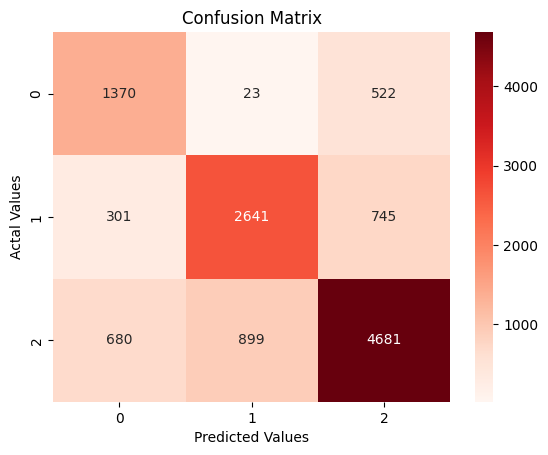

In [133]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm_rf, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
sns.heatmap(confusion_matrix(y_test, y_pred_rf),cmap='Reds',fmt='d',annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [109]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64      1915
           1       0.74      0.72      0.73      3687
           2       0.79      0.75      0.77      6260

    accuracy                           0.73     11862
   macro avg       0.70      0.73      0.71     11862
weighted avg       0.74      0.73      0.73     11862



In [110]:
rf_metrics1=classification_report(y_test, y_pred_rf,output_dict=True)
rf_df2=pd.DataFrame(rf_metrics1).transpose()
rf_test_precision=round(rf_df2.loc["macro avg"][0],3)
rf_test_recall=round(rf_df2.loc["1"][1],3)
rf_test_f1=round(rf_df2.loc["1"][2],3)
print ('Random Forest precision ',rf_test_precision)
print ('Random Forest recall ',rf_test_recall)
print ('Random Forest f1-score ',rf_test_f1)

Random Forest precision  0.704
Random Forest recall  0.716
Random Forest f1-score  0.729


In [144]:
# Make predictions on the Training data
y_pred_rf_t= best_grid2.predict(x_train)

# Evaluate the model's performance on the test data
accuracy_rf_t = accuracy_score(y_train, y_pred_rf_t)
print('Validation Accuracy:', accuracy_rf_t)

Validation Accuracy: 0.8461844197138315


In [145]:
# Confusion Matrix
cm_rf = confusion_matrix(y_train, y_pred_rf_t)
cm_df = pd.DataFrame(cm_rf, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
print('Confusion Matrix with Training Data:\n')
print(cm_df)

Confusion Matrix with Training Data:

          Good  Poor  Standard
Good      3635    58       681
Poor       485  7186      1063
Standard   634  1336     12598


In [146]:
rf_metrics1=classification_report(y_train, y_pred_rf_t,output_dict=True)
rf_df2=pd.DataFrame(rf_metrics1).transpose()
rf_test_precision_t=round(rf_df2.loc["macro avg"][0],3)
rf_test_recall_t=round(rf_df2.loc["macro avg"][1],3)
rf_test_f1_t=round(rf_df2.loc["macro avg"][2],3)
print ('Random Forest precision ',rf_test_precision_t)
print ('Random Forest recall ',rf_test_recall_t)
print ('Random Forest f1-score ',rf_test_f1_t)

Random Forest precision  0.827
Random Forest recall  0.84
Random Forest f1-score  0.833


## XGB

In [111]:
import xgboost as xgb

In [112]:
# Fit the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [113]:
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model's performance on the test data
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('Validation Accuracy:', accuracy_xgb)

Validation Accuracy: 0.7265216658236385


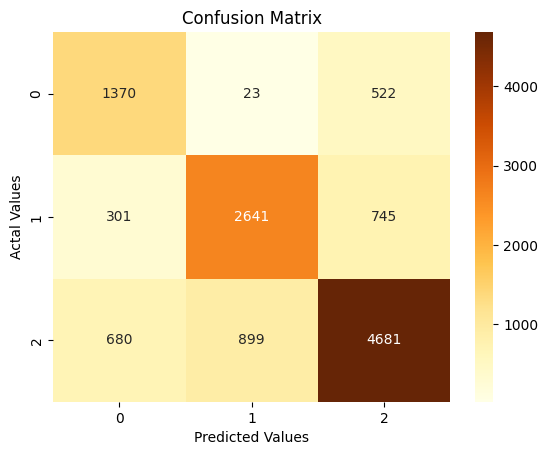

In [134]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm_xgb, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
sns.heatmap(confusion_matrix(y_test, y_pred_rf),cmap='YlOrBr',fmt='d',annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [135]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1915
           1       0.73      0.72      0.72      3687
           2       0.76      0.75      0.76      6260

    accuracy                           0.73     11862
   macro avg       0.70      0.71      0.70     11862
weighted avg       0.73      0.73      0.73     11862



In [136]:
xgb_metrics1=classification_report(y_test, y_pred_xgb,output_dict=True)
xgb_df2=pd.DataFrame(xgb_metrics1).transpose()
xgb_test_precision=round(xgb_df2.loc["macro avg"][0],3)
xgb_test_recall=round(xgb_df2.loc["macro avg"][1],3)
xgb_test_f1=round(xgb_df2.loc["macro avg"][2],3)
print ('XGB precision ',xgb_test_precision)
print ('XGB recall ',xgb_test_recall)
print ('XGB f1-score ',xgb_test_f1)

XGB precision  0.7
XGB recall  0.708
XGB f1-score  0.704


In [147]:
# Make predictions on the test data
y_pred_xgb_t = xgb_model.predict(x_train)

# Evaluate the model's performance on the test data
accuracy_xgb_t = accuracy_score(y_train, y_pred_xgb_t)
print('Validation Accuracy:', accuracy_xgb_t)

Validation Accuracy: 0.8887483740424917


In [148]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_train, y_pred_xgb_t)
cm_df = pd.DataFrame(cm_xgb, index = ['Good', 'Poor', 'Standard'], columns = ['Good', 'Poor', 'Standard'])
print('Confusion Matrix with Training Data:\n')
print(cm_df)

Confusion Matrix with Training Data:

          Good  Poor  Standard
Good      3865    17       492
Poor       234  7763       737
Standard   487  1112     12969


In [149]:
xgb_metrics1=classification_report(y_train, y_pred_xgb_t,output_dict=True)
xgb_df2=pd.DataFrame(xgb_metrics1).transpose()
xgb_test_precision_t=round(xgb_df2.loc["macro avg"][0],3)
xgb_test_recall_t=round(xgb_df2.loc["macro avg"][1],3)
xgb_test_f1_t=round(xgb_df2.loc["macro avg"][2],3)
print ('XGB precision ',xgb_test_precision_t)
print ('XGB recall ',xgb_test_recall_t)
print ('XGB f1-score ',xgb_test_f1_t)

XGB precision  0.876
XGB recall  0.888
XGB f1-score  0.882


# Model Evaluation

## Comparison of the performance metrics from the models

In [150]:
index=['Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'Decision Tree Training  ':[accuracy_dt_t,dt_test_recall_t,dt_test_precision_t,dt_test_f1_t],
     'Decision Tree Test      ':[accuracy_dt,dt_test_recall,dt_test_precision,dt_test_f1],
     'Random Forest Training  ':[accuracy_rf_t,rf_test_recall_t,rf_test_precision_t,rf_test_f1_t],
     'Random Forest Test      ':[accuracy_rf,rf_test_recall,rf_test_precision,rf_test_f1],
     'KNN Training            ':[accuracy_knn_t,knn_test_recall_t,knn_test_precision_t,knn_test_f1_t],
     'KNN Test                ':[accuracy_knn,knn_test_recall,knn_test_precision,knn_test_f1],
     'XGB Training            ':[accuracy_xgb_t,xgb_test_recall_t,xgb_test_precision_t,xgb_test_f1_t],
     'XGB Test                ':[accuracy_xgb,xgb_test_recall,xgb_test_precision,xgb_test_f1]
     } ,index=index)
round(data,3)

,Decision Tree Training,Decision Tree Test,Random Forest Training,Random Forest Test,KNN Training,KNN Test,XGB Training,XGB Test
Accuracy,0.720,0.682,0.846,0.733,0.838,0.662,0.889,0.727
Recall,0.736,0.699,0.840,0.716,0.830,0.628,0.888,0.708
Precision,0.691,0.655,0.827,0.704,0.818,0.627,0.876,0.700
F1 Score,0.702,0.666,0.833,0.729,0.824,0.628,0.882,0.704


In [156]:
index=['Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'Log Reg Training        ':[accuracy_log_t,logreg_test_recall_t,logreg_test_precision_t,logreg_test_f1_t],
     'Log Reg Test            ':[accuracy_log,logreg_test_recall,logreg_test_precision,logreg_test_f1],
     'Decision Tree Training  ':[accuracy_dt_t,dt_test_recall_t,dt_test_precision_t,dt_test_f1_t],
     'Decision Tree Test      ':[accuracy_dt,dt_test_recall,dt_test_precision,dt_test_f1],
     'Random Forest Training  ':[accuracy_rf_t,rf_test_recall_t,rf_test_precision_t,rf_test_f1_t],
     'Random Forest Test      ':[accuracy_rf,rf_test_recall,rf_test_precision,rf_test_f1],
     'KNN Training            ':[accuracy_knn_t,knn_test_recall_t,knn_test_precision_t,knn_test_f1_t],
     'KNN Test                ':[accuracy_knn,knn_test_recall,knn_test_precision,knn_test_f1],
     'XGB Training            ':[accuracy_xgb_t,xgb_test_recall_t,xgb_test_precision_t,xgb_test_f1_t],
     'XGB Test                ':[accuracy_xgb,xgb_test_recall,xgb_test_precision,xgb_test_f1]
     } ,index=index)
round(data,3)

,Log Reg Training,Log Reg Test,Decision Tree Training,Decision Tree Test,Random Forest Training,Random Forest Test,KNN Training,KNN Test,XGB Training,XGB Test
Accuracy,0.158,0.161,0.720,0.682,0.846,0.733,0.838,0.662,0.889,0.727
Recall,0.333,0.333,0.736,0.699,0.840,0.716,0.830,0.628,0.888,0.708
Precision,0.053,0.054,0.691,0.655,0.827,0.704,0.818,0.627,0.876,0.700
F1 Score,0.091,0.093,0.702,0.666,0.833,0.729,0.824,0.628,0.882,0.704


In [157]:
selected_features = list(x_train.columns.values)
selected_features

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [ ]:
# XGBoost has the best accuracy, recall, precision, and f1-score compared to other models.

## Feature Selection

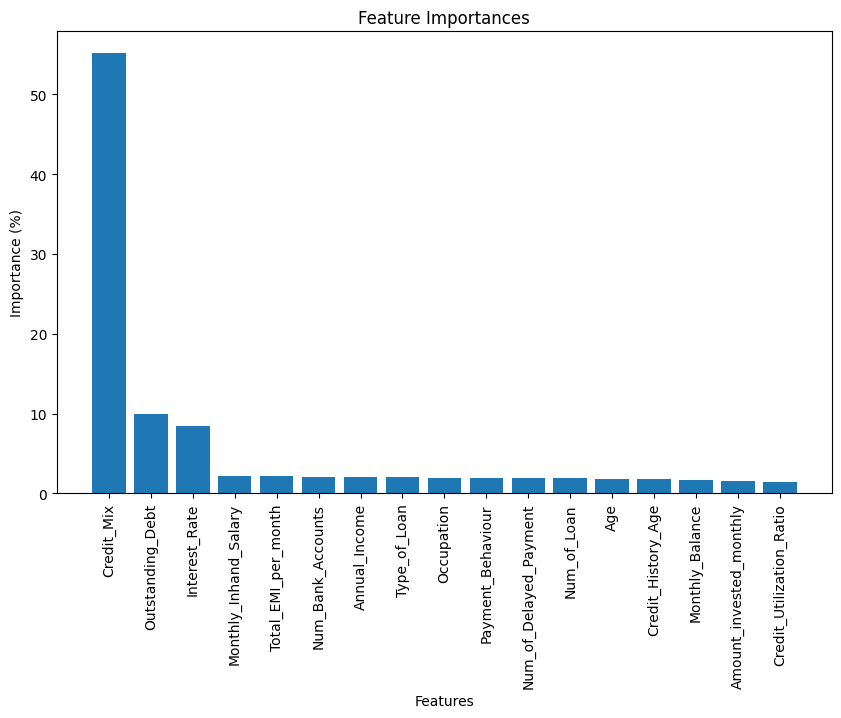

In [158]:
# Extract feature importances
importances = xgb_model.feature_importances_

# Creating a dataframe to store feature importances
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sorting the features based on their importance scores
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Calculating the total sum of importances for scaling
total_importance = feature_importances['Importance'].sum()

# Calculating the importance percentages
feature_importances['Importance_Percentage'] = (feature_importances['Importance'] / total_importance) * 100

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance_Percentage'])
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Using XGBoost model, I pulled the top contributing features for Credit Score Classification - Credit Mix, Outstanding Debt, and Interest Rate.